# ch4 신경망 학습

In [1]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t(np.log(y + delta)))

In [3]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [5]:
# 배치용 교차 엔트로피 오차
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 정답 레이블은 one-hot, predict는 index값
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [6]:
t_batch[np.arange(batch_size), np.argmax(t_batch, axis=1)] + 1e-7

array([1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001])

In [7]:
A = np.array(range(1,10)).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [8]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

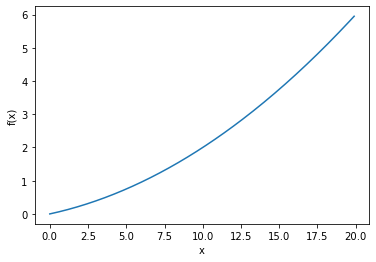

In [9]:
def function_1(x):
    return 0.01 * x**2 + 0.1*x
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [10]:
numerical_diff(function_1, 5)

0.1999999999990898

In [11]:
numerical_diff(function_1, 10)

0.2999999999986347

## 편미분

In [12]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [13]:
# x0 = 3, x1 = 4
def function_tmp1(x0):
    return x0*x0 + 4.0**2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [14]:
# x0 = 3, x1 = 4
def function_tmp2(x1):
    return 3.0**2 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 기울기

In [15]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 같은 형상
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [16]:
def func(x):
    return x[0]**2 + x[1]**2 + 3*x[0] + x[3]

In [17]:
numerical_gradient(func, np.array([3.0,4.0,5.0,7.0]))

array([9., 8., 0., 1.])

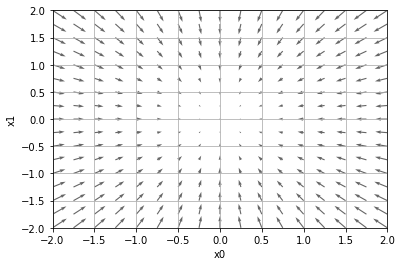

In [18]:
# 그림 4-9, f(x0,x1) = x0**2 + x1**2의 기울기
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = float(tmp_val) - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 -fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

def numerical_gradient(f,X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f,X)
    
    grad = np.zeros_like(X)
    for idx, X in enumerate(X):
        grad[idx] = _numerical_gradient_no_batch(f,X)
    return grad

def function_2(x):
    if x.ndim == 1: return np.sum(x**2)
    else : return np.sum(x**2, axis=1)

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X,Y = np.meshgrid(x0,x1)
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X,Y]))
    
    plt.figure()
    plt.quiver(X,Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

In [19]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2,init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [21]:
# learning-rate가 높을때
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2,init_x,lr=10,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [22]:
# learning-rate가 낮을때
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2,init_x,lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

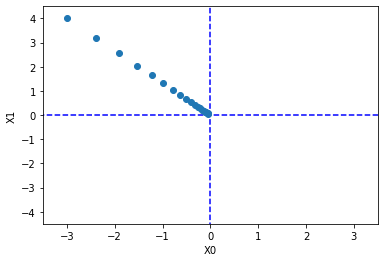

In [23]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2,init_x,lr=lr,step_num=step_num)

plt.plot([-5,5],[0,0],'--b')
plt.plot([0,0],[-5,5],'--b')
plt.plot(x_history[:,0],x_history[:,1],'o')

plt.xlim(-3.5,3.5)
plt.ylim(-4.5,4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 신경망에서의 기울기

In [24]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]
    
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [25]:
net = simpleNet()
print(net.W)

[[-0.72591231  0.37068252  1.39655505]
 [-1.16586849 -0.16965947  0.63404512]]


In [26]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[-1.48482903  0.06971599  1.40857364]


In [27]:
np.argmax(p)

2

In [28]:
t = np.array([1,0,0])
net.loss(x,t)

3.1691608748698727

In [29]:
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.57477538  0.11937969  0.45539569]
 [-0.86216307  0.17906953  0.68309354]]


In [30]:
f = lambda w: net.loss(x,t)
dw = numerical_gradient(f, net.W)
print(dw)

[[-0.57477538  0.11937969  0.45539569]
 [-0.86216307  0.17906953  0.68309354]]


## 학습 알고리즘 구현

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def numerical_gradient(f, x): # 느림
    h = 1e-04
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val -h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()
    return grad

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 너무 느림
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 위 내용 개선 
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [32]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [33]:
x = np.random.rand(100,784)
y = net.predict(x)

In [34]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

grads = net.gradient(x,t)

In [35]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


## 미니배치 학습 구현

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.77925, 0.784
train acc, test acc | 0.8722166666666666, 0.8748
train acc, test acc | 0.8947833333333334, 0.8978
train acc, test acc | 0.90545, 0.9082
train acc, test acc | 0.9126, 0.9126
train acc, test acc | 0.9169833333333334, 0.9202
train acc, test acc | 0.92335, 0.9232
train acc, test acc | 0.9264, 0.9277
train acc, test acc | 0.9306333333333333, 0.9317
train acc, test acc | 0.9332833333333334, 0.9327
train acc, test acc | 0.9357666666666666, 0.9356
train acc, test acc | 0.9385666666666667, 0.9378
train acc, test acc | 0.9409833333333333, 0.9395
train acc, test acc | 0.9430166666666666, 0.9415
train acc, test acc | 0.9448166666666666, 0.9425
train acc, test acc | 0.9464333333333333, 0.9451


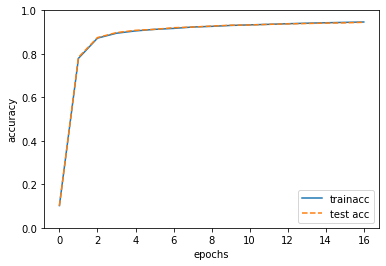

In [36]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼 파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iter_per_epoch = max(train_size / batch_size, 1)
train_loss_list = []
train_acc_list = []
test_acc_list = []

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch) # 너무 느림
    grad = network.gradient(x_batch, t_batch) # 개선
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print(f"train acc, test acc | {train_acc}, {test_acc}")

'''
markers = {'train':'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel('interation')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
'''
# 그래프 그리기
markers = {'train':'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='trainacc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()